In [51]:
import pandas as pd
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load Data

In [52]:
data = pd.read_csv("C:/Users/Harish/Desktop/GUVI/FinalProject_2/Data/customer_segmentation_dataset.csv")
data.head()

,Customer_ID,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
0,CUST_000001,52,78190,2,2459.48,2,0
1,CUST_000002,42,63069,1,907.63,1,1
2,CUST_000003,54,59694,2,2214.42,1,0
3,CUST_000004,67,59495,1,1279.56,1,0
4,CUST_000005,41,58873,1,1224.64,0,1


In [53]:
data.isnull().sum()

Customer_ID           0
Age                   0
Annual_Income         0
Policy_Count          0
Total_Premium_Paid    0
Claim_Frequency       0
Policy_Upgrades       0
dtype: int64

# Explorartory Data Analysis

In [37]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         1000 non-null   object 
 1   Age                 1000 non-null   int64  
 2   Annual_Income       1000 non-null   int64  
 3   Policy_Count        1000 non-null   int64  
 4   Total_Premium_Paid  1000 non-null   float64
 5   Claim_Frequency     1000 non-null   int64  
 6   Policy_Upgrades     1000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 54.8+ KB
None


In [7]:
print(data.describe())

               Age  Annual_Income  Policy_Count  Total_Premium_Paid  \
count  1000.000000    1000.000000   1000.000000         1000.000000   
mean     44.904000   63286.216000      1.292000         1621.656930   
std      14.178639   35833.578969      0.597573         1551.985045   
min      18.000000   25000.000000      1.000000          610.560000   
25%      35.000000   42514.500000      1.000000          905.740000   
50%      45.000000   54603.500000      1.000000         1084.550000   
75%      54.000000   69465.750000      1.000000         1438.602500   
max      80.000000  222582.000000      4.000000        12782.240000   

       Claim_Frequency  Policy_Upgrades  
count      1000.000000      1000.000000  
mean          0.996000         0.203000  
std           0.933196         0.458259  
min           0.000000         0.000000  
25%           0.000000         0.000000  
50%           1.000000         0.000000  
75%           1.000000         0.000000  
max           5.000000  

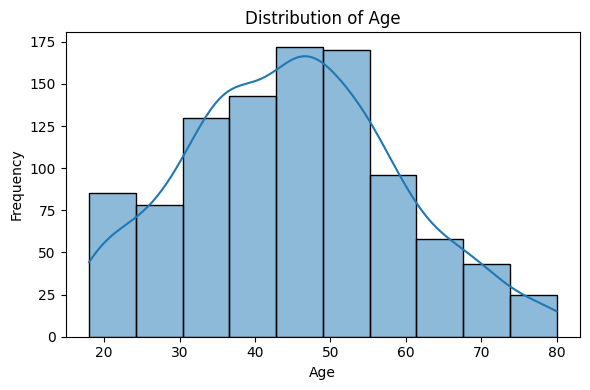

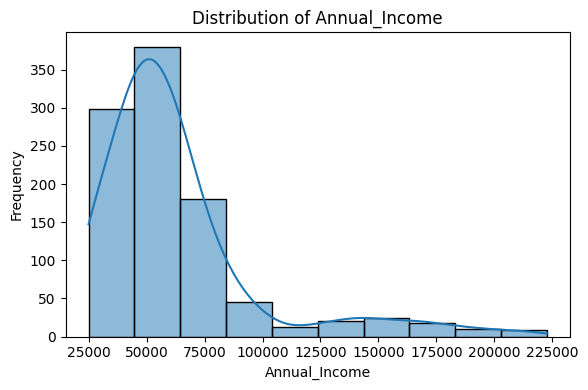

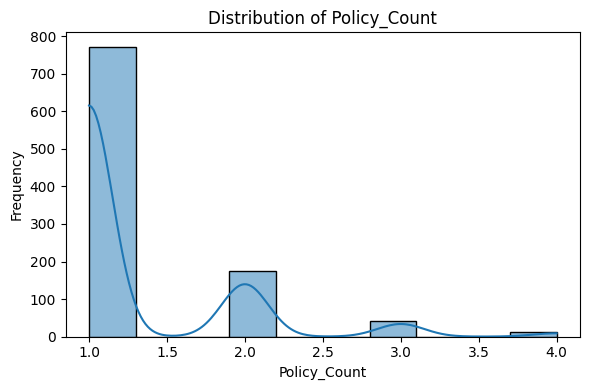

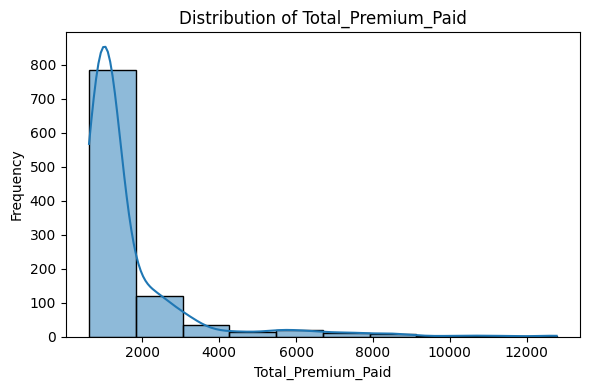

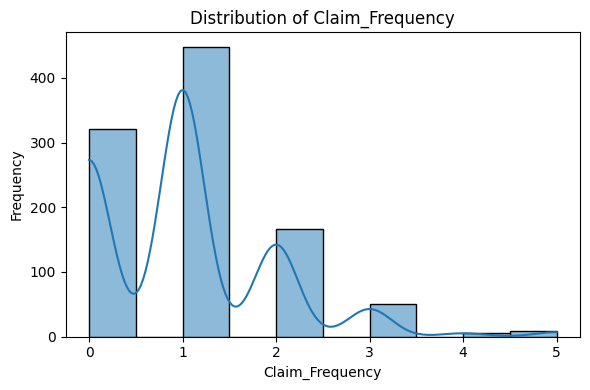

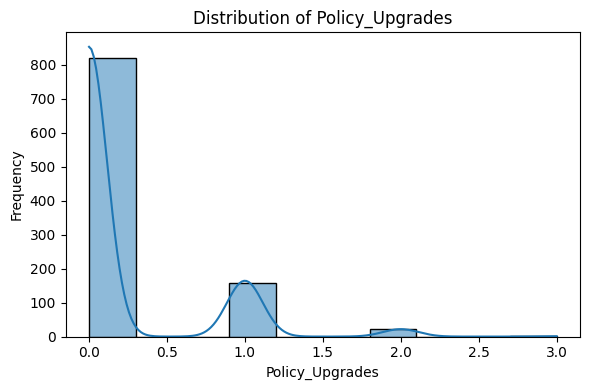

In [9]:
numeric_cols = ['Age', 'Annual_Income', 'Policy_Count', 'Total_Premium_Paid', 'Claim_Frequency', 'Policy_Upgrades']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=10)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

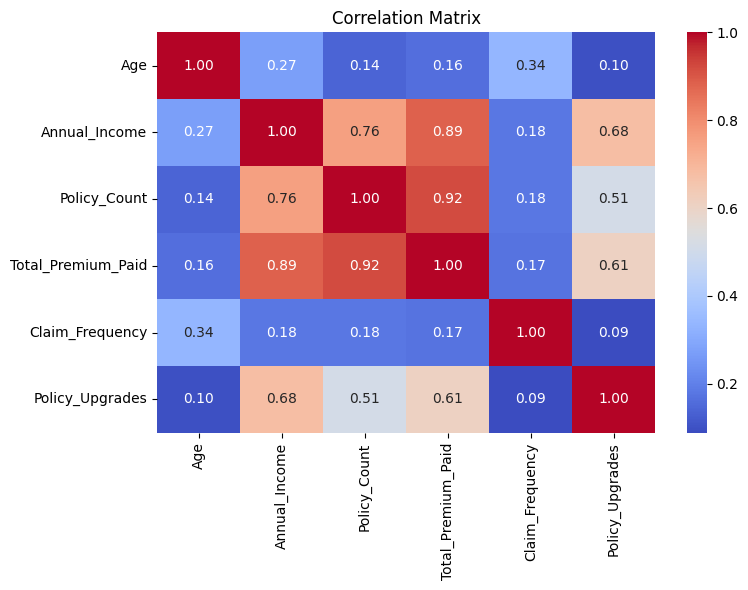

In [10]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
corr = data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

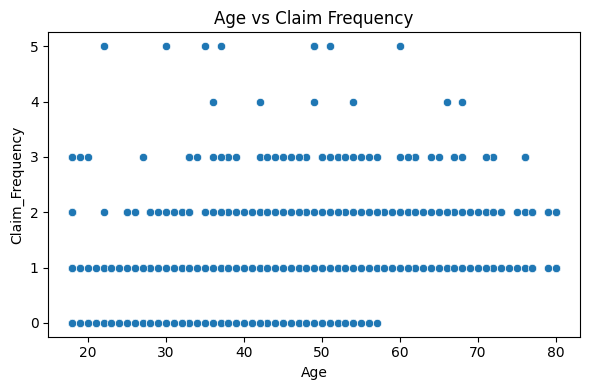

In [17]:
# Scatterplot: Age vs Claim Frequency
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Claim_Frequency', data=data)
plt.title("Age vs Claim Frequency")
plt.tight_layout()
plt.show()

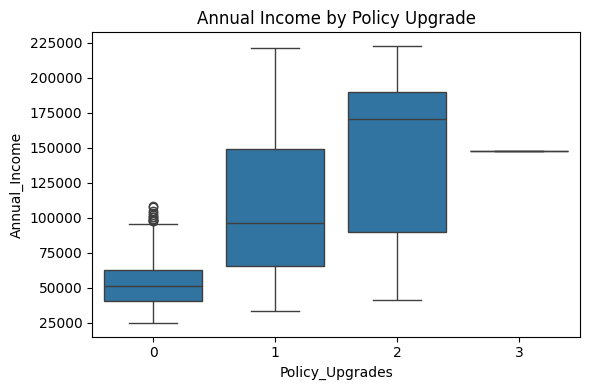

In [19]:
#Boxplot: Annual Income vs Policy Upgrades
plt.figure(figsize=(6, 4))
sns.boxplot(x='Policy_Upgrades', y='Annual_Income', data=data)
plt.title("Annual Income by Policy Upgrade")
plt.tight_layout()
plt.show()

# Model Training and Prediction - KMeans Clusering

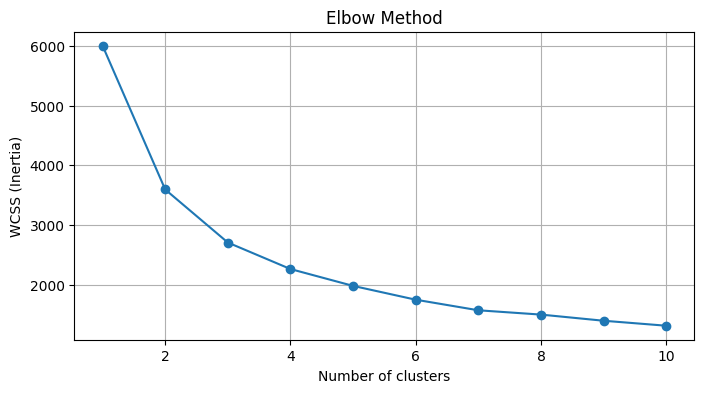

In [54]:
# Drop non-numeric or ID column
data = data.drop(columns=["Customer_ID"])

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

# Elbow Method to find optimal number of clusters (k)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (Inertia)")
plt.grid()
plt.show()

In [70]:
# Apply PCA before clustering
pca = PCA(n_components=2)  # You can also use n_components=0.95 for automatic selection
reduced_features = pca.fit_transform(scaled_features)

# Fit KMeans on reduced data
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
data["Cluster"] = kmeans.fit_predict(reduced_features)


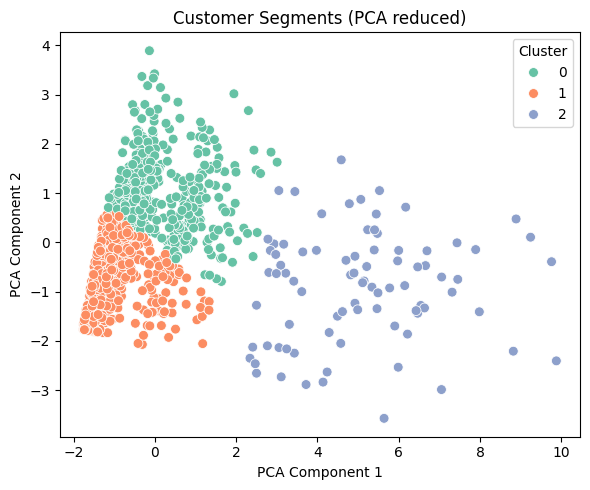

               Age  Annual_Income  Policy_Count  Total_Premium_Paid  \
Cluster                                                               
0        56.223919   64407.931298      1.282443         1488.871221   
1        36.347328   46846.034351      1.064885         1037.355878   
2        45.325301  161765.987952      2.771084         5939.229639   

         Claim_Frequency  Policy_Upgrades  
Cluster                                    
0               1.620865         0.157761  
1               0.473282         0.076336  
2               1.337349         1.216867  


In [71]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=data["Cluster"], palette="Set2", s=50)
plt.title("Customer Segments (PCA reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# View segmented data
print(data.groupby("Cluster").mean())

### Each cluster reveals a customer segment, e.g.:

1. Cluster 2: Middle aged, high income, high policy count, high premium paid, more-policy upgrades group
2. Cluster 1: Younger, low-income, low-claims group
3. Cluster 0: Older, avg-income, high claim-freq group

### Calculate Silhouette Score

In [72]:
sil_score = silhouette_score(reduced_features, data["Cluster"])
print(f"Silhouette Score (k={optimal_k}): {sil_score:.3f}")

Silhouette Score (k=3): 0.440


In [73]:
for k in range(2, 10):
    kmeans1 = KMeans(n_clusters=k, random_state=42)
    labels = kmeans1.fit_predict(reduced_features)
    score = silhouette_score(reduced_features, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")

k=2, Silhouette Score=0.675
k=3, Silhouette Score=0.440
k=4, Silhouette Score=0.435
k=5, Silhouette Score=0.384
k=6, Silhouette Score=0.412
k=7, Silhouette Score=0.417
k=8, Silhouette Score=0.427
k=9, Silhouette Score=0.426


# Model - DBScan

In [60]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.5, min_samples=6)
labels = dbscan.fit_predict(reduced_features)

# Check number of clusters (excluding noise)
unique_labels = set(labels)
n_clusters = len([label for label in unique_labels if label != -1])
print(f"Clusters found (excluding noise): {n_clusters}")
print("Label counts:", np.unique(labels, return_counts=True))

# Compute silhouette score only if >=2 clusters
if n_clusters >= 2:
    score = silhouette_score(reduced_features, labels)
    print(f"DBSCAN Silhouette Score: {score:.3f}")
else:
    print("Silhouette Score cannot be computed — only one cluster or all noise.")

Clusters found (excluding noise): 1
Label counts: (array([0]), array([1000]))
Silhouette Score cannot be computed — only one cluster or all noise.


In [63]:
import numpy as np
print("Clusters found:", len(np.unique(labels)))
print("Cluster labels:", np.unique(labels))

Clusters found: 1
Cluster labels: [0]


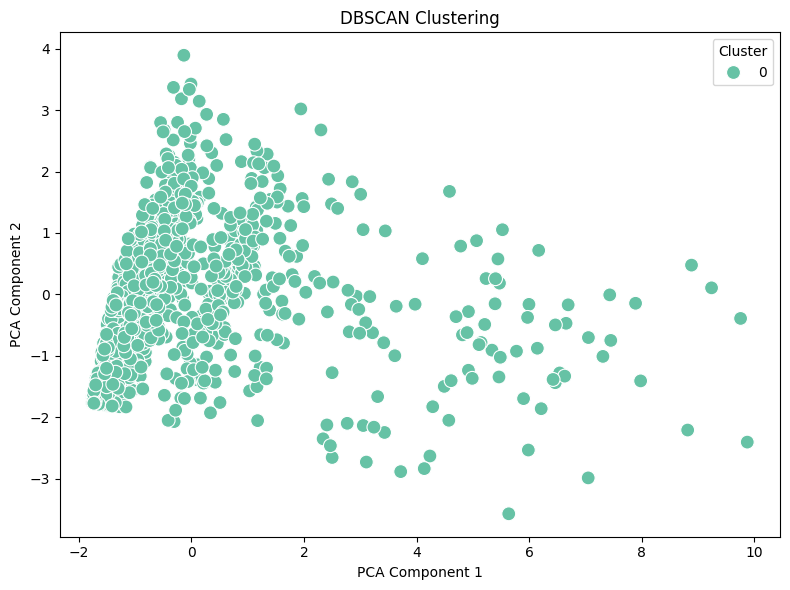

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    hue=labels,
    palette='Set2',
    s=100
)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# Save the KMeans Model & Scaler

In [77]:
import joblib
from joblib import dump

model_data = {
    'model': kmeans,
    'scaler': scaler,
    'pca':pca
}
dump(model_data, 'C:/Users/Harish/Desktop/GUVI/FinalProject_2/artifacts/kmeans/model_data.joblib')

['C:/Users/Harish/Desktop/GUVI/FinalProject_2/artifacts/kmeans/model_data.joblib']

In [33]:
#Saved the Kmeans clustering model with ncluster = 3. 
#This model gives better interpretation of the cluster when compared to KMeans with ncluster = 2 and DBScan